## Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.

Выполнил студент гр. 3385 Савранский Данила Сергеевич. Вариант №11.

## Цель работы

Овладеть навыками работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения и анализа сетей аффилированности.

## Основные теоретические положения

### Точки сочленения и мосты сети
Точки сочленения - вершины, удаление которых увеличивает число компонент связности графа.  
Мосты - ребра, удаление которых увеличивает число компонент связности графа.

### Централизация сети
Степень центральность:
$
C_D(v_i) = \deg(v_i), \quad 
C_D = \frac{\sum_{i=1}^n \left[ \max_j \deg(v_j) - \deg(v_i) \right]}{(n-1)(n-2)}
$

Централизация по близости:
$
C_C(v_i) = \frac{n-1}{\sum_{j=1}^{n} d(v_i,v_j)}, \quad 
C_C = \frac{\sum_{i=1}^n \left[ \max_j C_C(v_j) - C_C(v_i) \right]}{n-1}
$

Централизация по посредничеству:
$
C_B(v_i) = \sum_{s \neq i \neq t} \frac{\sigma_{st}(v_i)}{\sigma_{st}}, \quad
C_B = \frac{\sum_{i=1}^n \left[ \max_j C_B(v_j) - C_B(v_i) \right]}{(n-1)(n-2)/2}
$

### $k$-ядра
$k$-ядро графа - максимальная подгруппа вершин, где каждая вершина имеет как минимум $k$ связей внутри подгруппы:
$
G_k = \{ v \in V(G) \,|\, \deg_{G_k}(v) \ge k \}
$

### Гиперграф
Гиперграф $H=(V,E)$ - обобщение графа, где ребро $e \in E$ может соединять более двух вершин:
$
e \subseteq V, \quad |e| \ge 1
$

### Логарифм отношения шансов (log odds)
Для двух событий $i$ и $j$ логарифм отношения шансов определяется как:
$
\text{log-odds}(i,j) = \log \frac{P(i \cap j) / P(i \cap \bar{j})}{P(\bar{i} \cap j) / P(\bar{i} \cap \bar{j})} 
= \log \frac{a \cdot d}{b \cdot c}
$
где 

$a$ - количество общих акторов в $i$ и $j$, 

$b$ - акторы только в $i$, 

$c$ - акторы только в $j$, 

$d$ - акторы в обоих событиях отсутствуют.


## Постановка задачи

С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей на предмет подгрупп. Провести исследование сети аффилированности CEO. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

1. Из файла florentine_business.csv (для нечётных вариантов) и файла florentine_marital.csv (для чётных вариантов) извлечь социоматрицу с помощью соответствующих функций. Вывести полученную социоматрицу на экран.

In [1]:
library(igraph)
library(network)


Присоединяю пакет: 'igraph'


Следующие объекты скрыты от 'package:stats':

    decompose, spectrum


Следующий объект скрыт от 'package:base':

    union



'network' 1.19.0 (2024-12-08), part of the Statnet Project
* 'news(package="network")' for changes since last version
* 'citation("network")' for citation information
* 'https://statnet.org' for help, support, and other information



Присоединяю пакет: 'network'


Следующие объекты скрыты от 'package:igraph':

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute




Warning message:
"The `adjmatrix` argument of `graph_from_adjacency_matrix()` must be symmetric with mode = "undirected" as of igraph
1.6.0.
ℹ Use mode = "max" to achieve the original behavior."


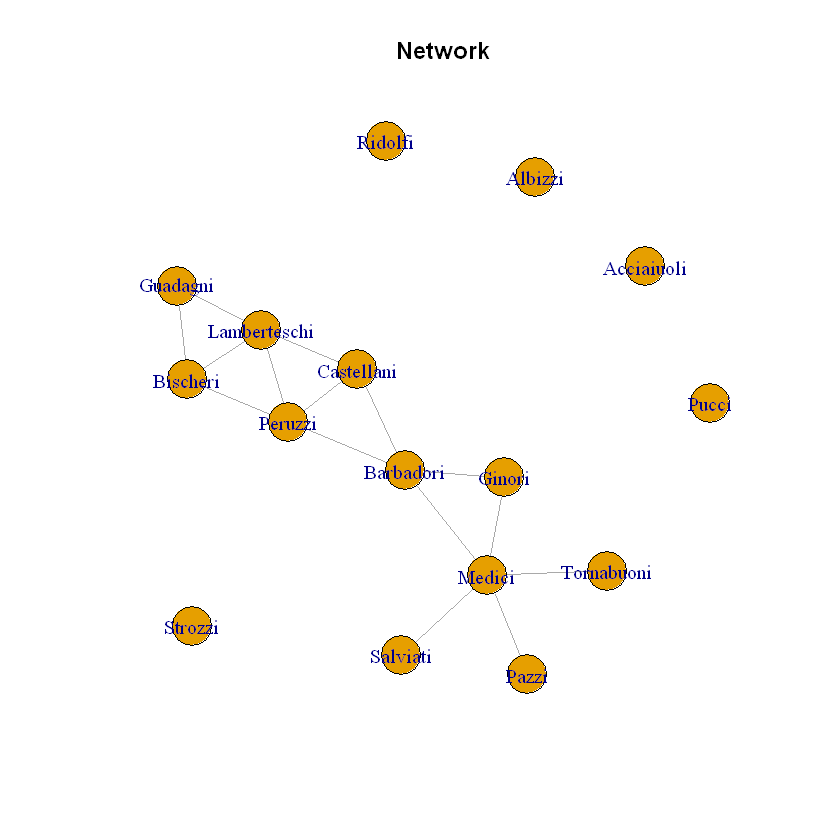

In [2]:
data <- read.csv("florentine_business.csv", header = TRUE, comment.char = "#")

m <- as.matrix(data)

g <- graph_from_adjacency_matrix(m, mode = "undirected", weighted = FALSE)


plot(g, layout = layout_with_fr, main = "Network")

2. Выявить точки сочленения и мосты сети. Подтвердить свои догадки с помощью соответствующих функций. Построить графики сети, на котором выделены точки сочленения и мосты

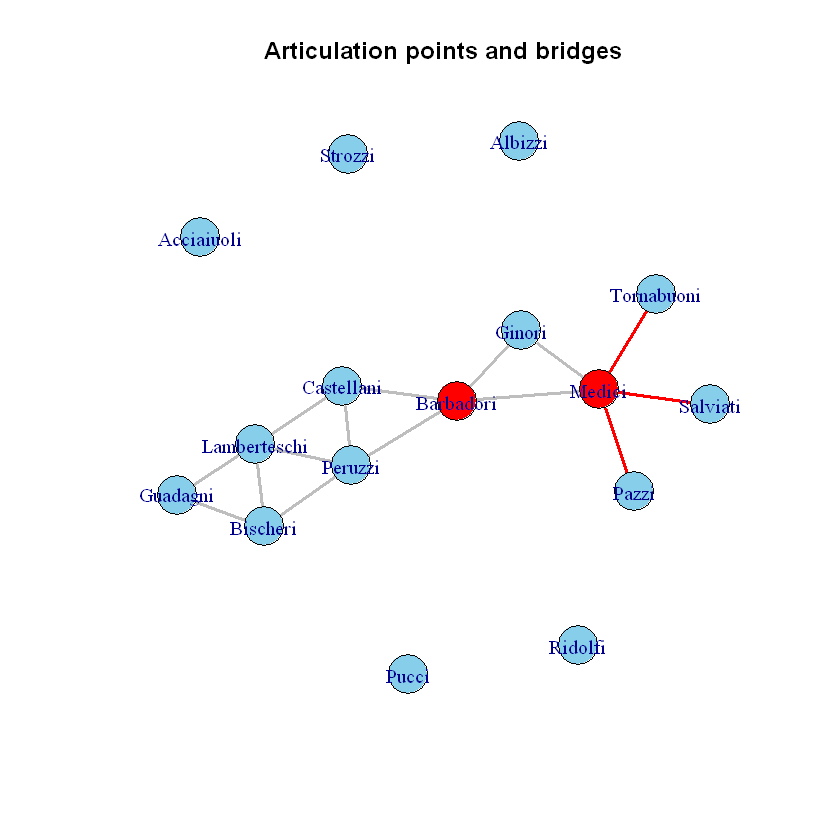

In [3]:
art_points <- articulation_points(g) # Точки сочленения

bridge_edges <- bridges(g) # Мосты

E(g)$color <- "gray"
E(g)$width <- 3
V(g)$color <- "skyblue"

E(g)[bridge_edges]$color <- "red"
V(g)[art_points]$color <- "red"

plot(g, layout = layout_with_fr, main = "Articulation points and bridges")

3. Вычислить значение централизации для каждой меры. Сделать выводы

In [4]:
deg <- degree(g)
g_iso <- delete_vertices(g, which(deg == 0))
deg <- degree(g_iso)

n <- vcount(g_iso)
num_deg <- sum(max(deg) - deg)
C_deg <- num_deg / ((n - 1) * (n - 2))

bet <- betweenness(g_iso, directed = FALSE)
num_bet <- sum(max(bet) - bet)
C_bet <- num_bet / ((n - 1) * (n - 2) * (n - 3) / 2)

clo <- closeness(g_iso, normalized = TRUE)
num_clo <- sum(max(clo) - clo)
C_clo <- num_clo / ((n - 1) * (n - 2) / (2*n - 3))

cat("Централизация по степени:", round(C_deg, 2), "\n")
cat("Централизация по близости:",  round(C_clo, 2), "\n")
cat("Централизация по посредничеству:", round(C_bet, 2), "\n")

Централизация по степени: 0.28 
Централизация по близости: 0.35 
Централизация по посредничеству: 0.55 


Централизация по степени (0.28): сеть умеренно распределена, нет выраженных хабов.

Централизация по близости (0.35): доступ к остальным узлам распределён относительно равномерно.

Централизация по посредничеству (0.55): в сети выделяются узлы-посредники, через которые проходит значительная часть путей.

4. Исследовать данную сеть на предмет подгрупп с помощью 𝑘-ядер. Указать какие подгруппы получились. Сделать выводы.

In [5]:
core_vals <- coreness(g)
table(core_vals)

core_vals
0 1 2 
5 3 8 

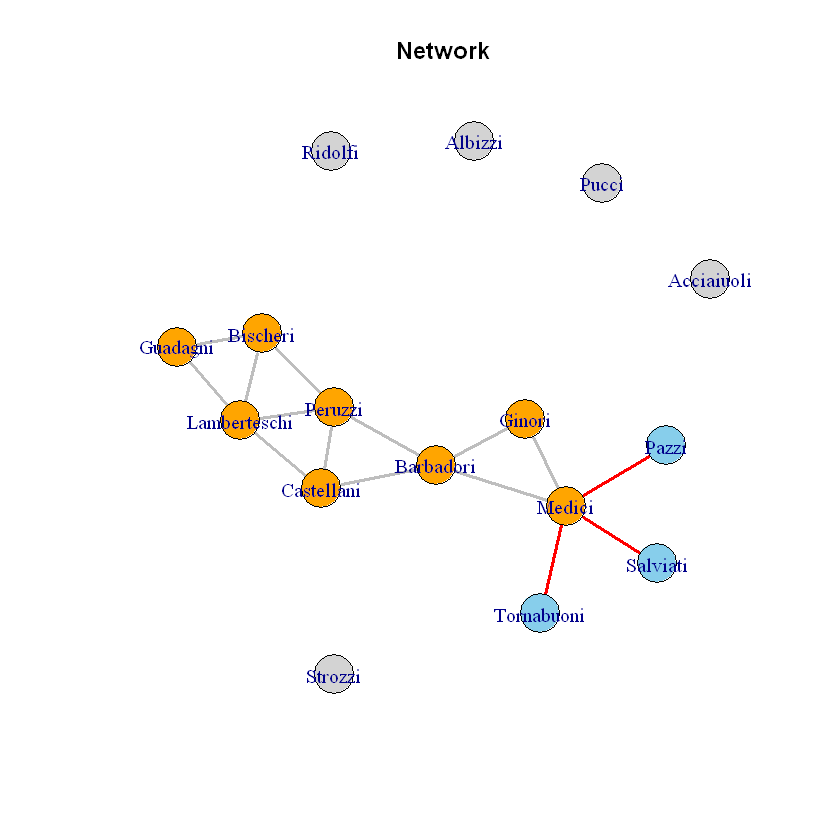

In [6]:
core_colors <- c("lightgray", "skyblue", "orange", "darkred")

V(g)$color <- core_colors[core_vals + 1]

plot(g, layout = layout_with_fr, main = "Network")

0-core (5 узлов) - 5 изолированных вершин

1-core (3 узла) - 3 лиственных вершин

2-core (8 узлов) - Основное ядро

5. С помощью библиотеки igraph исследовать алгоритмы обнаружения сообществ в зависимости от номера варианта:

    Spinglass

    Walktrap
   
    Label propagation
Кратко объяснить суть каждого алгоритма. Вывести значение модулярности и отобразить полученные сообщества.

In [7]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.2
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%--%()      masks igraph::%--%()
✖ dplyr::as_data_frame() masks tibble::as_data_frame(), igraph::as_data_frame()
✖ purrr::compose()       masks igraph::compose()
✖ tidyr::crossing()      masks igraph::crossing()
✖ dplyr::filter()        masks stats::filter()
✖ dplyr::lag()           masks stats::lag()
✖ purrr::simplify()      masks igraph::simplify()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


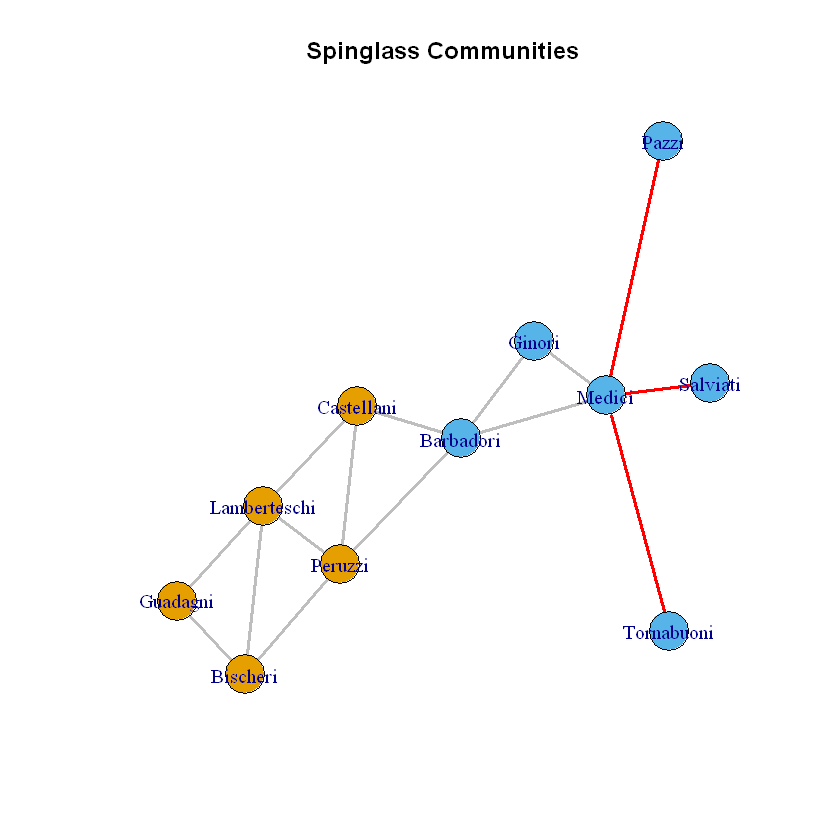

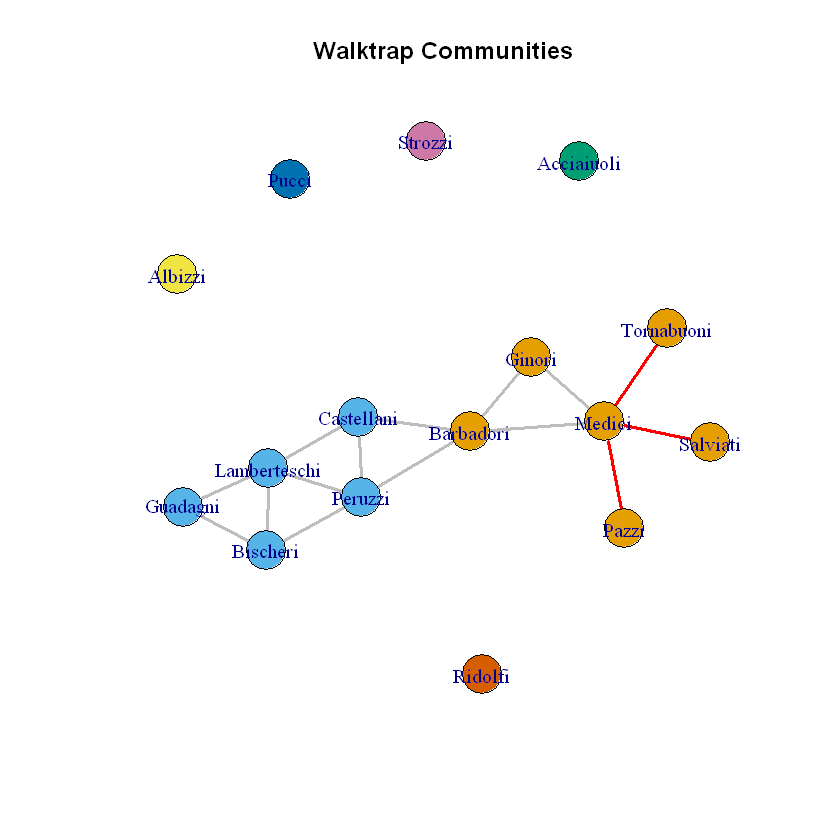

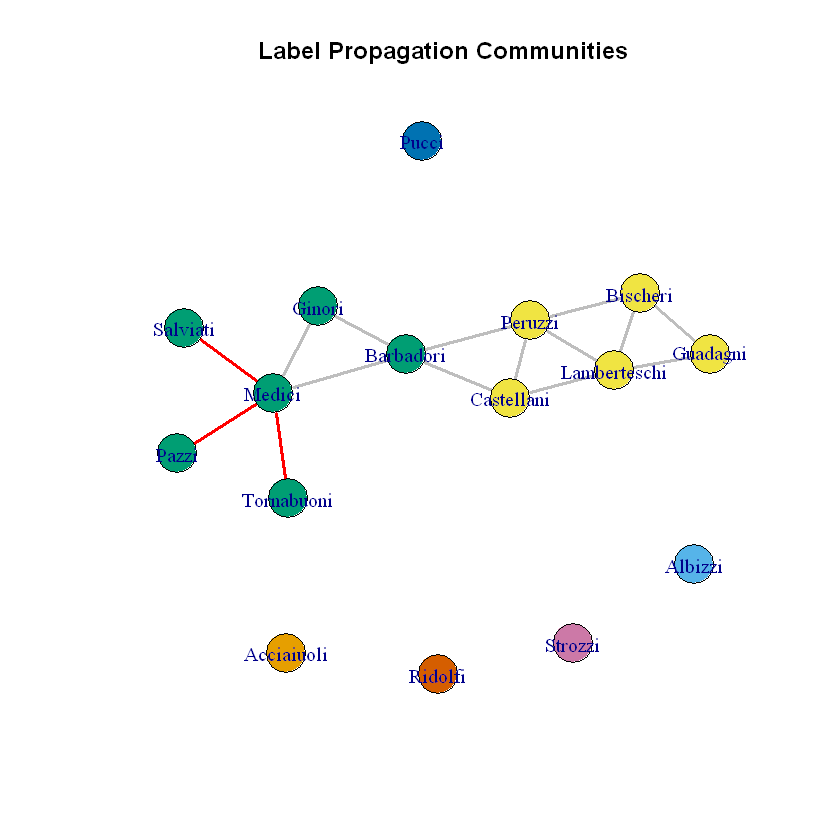

In [8]:
# В этой модели каждая вершина может находиться в одном из k состояний, а взаимодействия между вершинами определяют, 
# какие пары вершин предпочтут оставаться в одном и том же состоянии, а какие — иметь разные состояния. 
# Модель моделируется в течение заданного числа шагов, и состояния вершин в конце определяют сообщества.
spinglass_comm <- cluster_spinglass(g_iso)

# Основная идея заключается в том, что если совершать случайные блуждания по графу, то вероятность того,
# что блуждания останутся в пределах одного сообщества, выше, поскольку существует лишь несколько ребер, ведущих за пределы данного сообщества.
# Этот метод выполняет короткие случайные блуждания из 3-4-5 шагов и использует результаты этих случайных блужданий для определения сообществ
walktrap_comm <- cluster_walktrap(g)

# Это подход, при котором каждому узлу присваивается одна из k меток. 
# Затем метод итеративно переназначает метки узлам таким образом, 
# чтобы каждый узел синхронно выбирал наиболее часто встречающуюся метку среди своих соседей. 
# Метод останавливается, когда метка каждого узла становится одной из наиболее часто встречающихся меток в его окрестности.
label_comm <- cluster_label_prop(g)

V(g_iso)$color <- membership(spinglass_comm)
plot(g_iso, layout=layout_with_fr, main="Spinglass Communities")

V(g)$color <- membership(walktrap_comm)
plot(g, layout=layout_with_fr, main="Walktrap Communities")

V(g)$color <- membership(label_comm)
plot(g, layout=layout_with_fr, main="Label Propagation Communities")


In [9]:
modularity(spinglass_comm)
modularity(walktrap_comm)
modularity(label_comm)

[1] 0.3644444

[1] 0.3644444

[1] 0.3644444

6. Из файла ceo.csv извлечь матрицу инцидентности с помощью соответствующих функций. Отобразить полученную матрицу.

In [10]:
ceo <- read.csv("ceo.csv", comment.char = "#", header = FALSE)

ceo_matrix <- as.matrix(ceo)
ceo_matrix 

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


7. Отобразить сеть в виде биграфа.

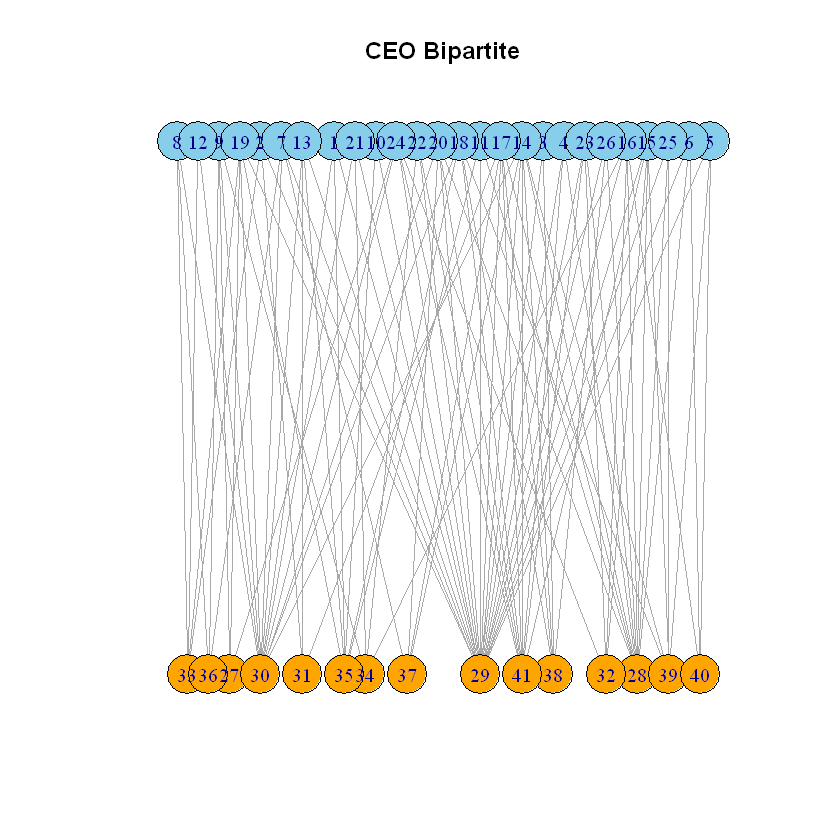

In [11]:
g_ceo <- graph_from_biadjacency_matrix(ceo_matrix)

V(g_ceo)$color <- ifelse(V(g_ceo)$type, "orange", "skyblue")

plot(g_ceo, layout = layout_as_bipartite, main = "CEO Bipartite")

9. Представить сеть аффилированности в виде двух одномодальных сетей: сеть совместного участия акторов и сеть перекрытия событий. Представить полученные сети в виде матриц и взвешенных графов. Сделать выводы.

0,1,1,1,1,1,2,1,1,2,⋯,1,2,3,2,2,1,1,2,1,1
1,0,1,1,1,1,1,1,0,1,⋯,2,0,2,1,1,1,1,1,1,1
1,1,0,1,1,1,1,0,0,1,⋯,2,1,1,1,1,1,1,1,1,2
1,1,1,0,1,2,1,0,0,1,⋯,3,1,1,3,1,2,3,2,2,2
1,1,1,1,0,2,1,0,0,1,⋯,1,1,1,1,1,1,1,1,2,1
1,1,1,2,2,0,1,0,0,1,⋯,2,0,1,2,1,1,2,1,2,2
2,1,1,1,1,1,0,2,2,1,⋯,2,1,2,3,2,1,1,2,1,1
1,1,0,0,0,0,2,0,2,0,⋯,0,1,2,1,1,0,0,1,0,0
1,0,0,0,0,0,2,2,0,0,⋯,0,1,2,1,2,1,0,2,0,0
2,1,1,1,1,1,1,0,0,0,⋯,1,1,2,1,1,1,1,1,1,1
2,1,1,2,1,2,1,0,0,2,⋯,2,1,2,2,1,1,2,1,2,2


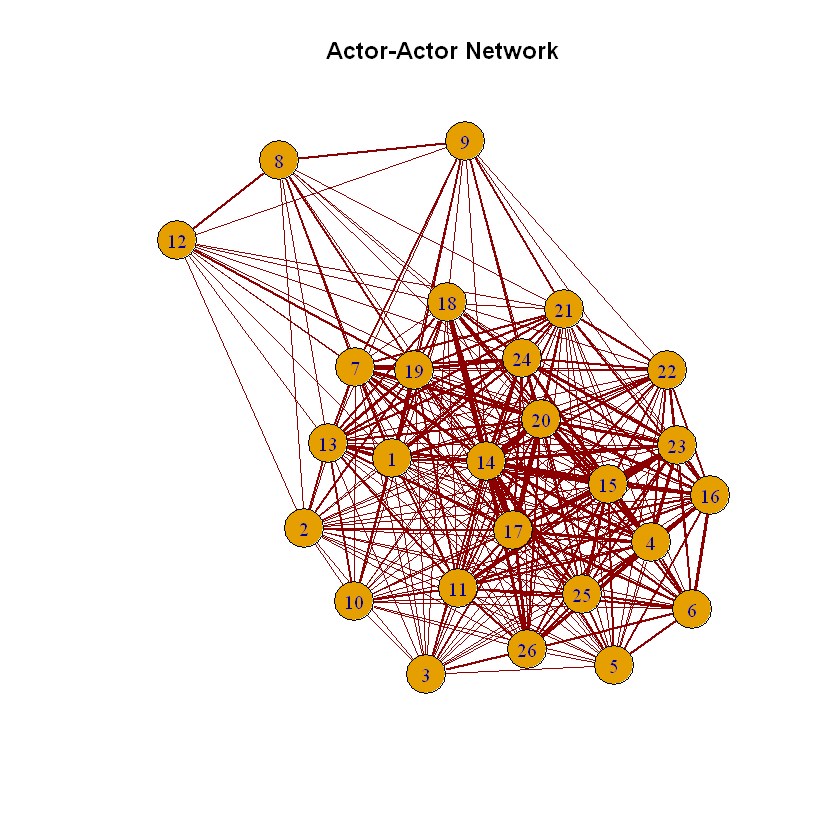

In [12]:
# Одномодальная сеть акторов
actor_matrix <- ceo_matrix %*% t(ceo_matrix)
diag(actor_matrix) <- 0 

g_actor <- graph_from_adjacency_matrix(actor_matrix, mode="undirected", weighted=TRUE)

actor_matrix

plot(g_actor, layout=layout_with_fr, edge.color="darkred", edge.width=E(g_actor)$weight, main="Actor-Actor Network")


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
V1,0,0,2,3,0,1,1,1,1,1,0,0,0,0,1
V2,0,0,11,2,1,3,0,1,1,0,3,3,3,2,6
V3,2,11,0,8,3,4,2,3,5,1,4,4,4,3,8
V4,3,2,8,0,1,1,3,2,4,3,3,2,2,0,4
V5,0,1,3,1,0,0,1,0,1,0,1,1,0,0,1
V6,1,3,4,1,0,0,0,1,0,0,0,0,1,1,3
V7,1,0,2,3,1,0,0,0,1,1,0,0,0,0,0
V8,1,1,3,2,0,1,0,0,0,1,0,0,0,1,1
V9,1,1,5,4,1,0,1,0,0,0,0,1,1,0,1
V10,1,0,1,3,0,0,1,1,0,0,1,0,0,0,0


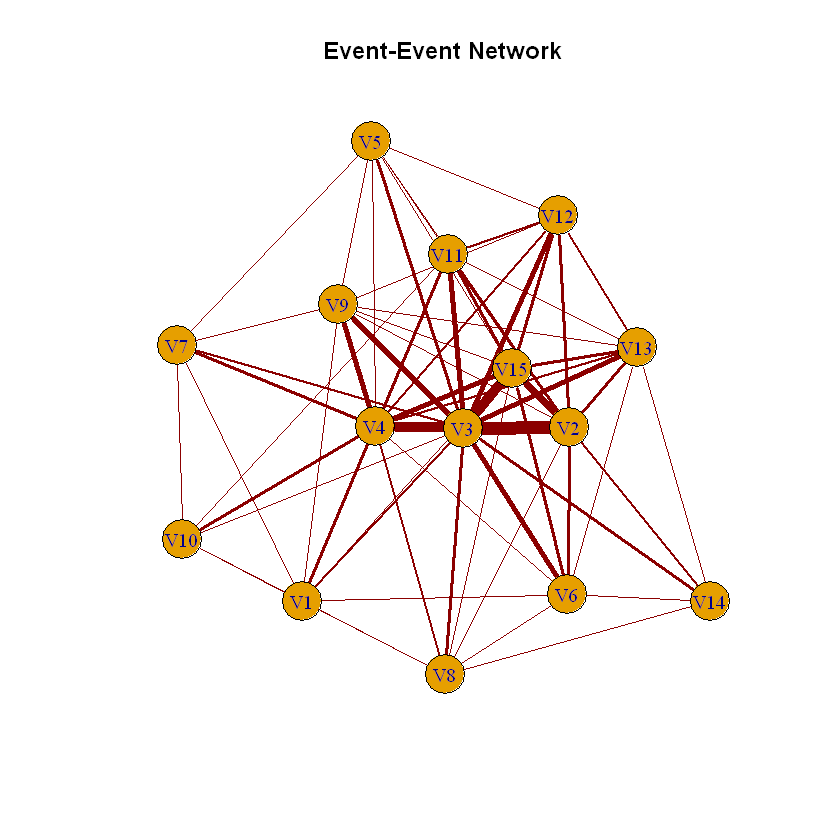

In [13]:
# Одномодальная сеть событий
event_matrix <- t(ceo_matrix) %*% ceo_matrix
diag(event_matrix) <- 0

event_matrix

g_event <- graph_from_adjacency_matrix(event_matrix, mode="undirected", weighted=TRUE)

plot(g_event, layout=layout_with_fr, edge.color="darkred", edge.width=E(g_event)$weight, main="Event-Event Network")


Плотность сети: Присутствуют только 1/8 возможных связей.

Количество компонент: Многие семьи не связаны между собой ни напрямую, ни через посредников.

Диаметр: Узлы могут быть относительно далеко друг от друга даже в связной части сети.

Коэффициент кластеризации: Узлы образуют небольшие локальные группы.

10. Вычислить степень участия для каждого актора, а также среднее количество событий, с которыми актор аффилирован.

In [14]:
actor_degree <- rowSums(ceo_matrix)
mean_actor_degree <- mean(actor_degree)

actor_degree
cat("Среднее количество событий на актор:", mean_actor_degree, "\n")


[1] 3 3 2 3 3 3 4 3 4 2 3 2 4 7 5 5 6 5 5 5 3 3 4 5 3 3

Среднее количество событий на актор: 3.769231 


В среднем каждый CEO состоит в 3.769231 клубах

11. Вычислить размер и средний размер для каждого события. Сделать выводы.

In [15]:
event_degree <- colSums(ceo_matrix)
mean_event_degree <- mean(event_degree)

event_degree
cat("Средний размер событий:", mean_event_degree, "\n")


V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 
  3  11  22  12   3   4   4   4   6   3   4   5   5   3   9

Средний размер событий: 6.533333 


В среднем в каждом клубе состоит 6.533333 CEO

12. Вычислить плотность для отношения совместного участия акторов и отношения перекрытия. Проинтерпретируйте полученные значения.

In [16]:
density_actor <- edge_density(g_actor)
cat("Плотность сети совместного участия акторов:", round(density_actor,3), "\n")

density_event <- edge_density(g_event)
cat("Плотность сети перекрытия событий:", round(density_event,3), "\n")


Плотность сети совместного участия акторов: 0.874 
Плотность сети перекрытия событий: 0.629 


Плотность совместного участия актеров очень большая - значит большинство CEO знакомы с друг другом через единственный клуб

Плотность сети перекрытия событий - Умеренно высокая плотность, многие клубы имеют общих CEO, но не все.


13. Определить диаметр сети аффилированности.

In [17]:
diam_bip <- diameter(g_ceo)
cat("Диаметр сети аффилированности:", diam_bip, "\n")

Диаметр сети аффилированности: 5 


14. Для каждых пар событий определить (логарифм) отношение шансов. Сделать выводы

In [18]:
n_actors <- nrow(ceo_matrix)
log_odds_matrix <- matrix(0, ncol = ncol(ceo_matrix), nrow = ncol(ceo_matrix))

for(i in 1:ncol(ceo_matrix)){
  for(j in 1:ncol(ceo_matrix)){
    a <- sum(ceo_matrix[,i] & ceo_matrix[,j])       # общие акторы
    b <- sum(ceo_matrix[,i] & !ceo_matrix[,j])      # только i
    c <- sum(!ceo_matrix[,i] & ceo_matrix[,j])      # только j
    d <- sum(!ceo_matrix[,i] & !ceo_matrix[,j])     # ни i ни j

    log_odds_matrix[i,j] <- round(log((a*d + 0.5) / (b*c + 0.5)), 2)
  }
}

diag(log_odds_matrix) <- 0 
log_odds_matrix

0.00,-4.20,-1.15,4.44,-2.94,1.15,1.15,1.15,0.57,1.56,-3.22,-3.43,-3.43,-2.94,-0.06
-4.20,0.00,4.49,-2.15,-0.42,1.61,-4.49,-0.89,-1.57,-4.20,1.61,0.87,0.87,1.10,1.54
-1.15,4.49,0.00,-4.73,3.22,3.50,-2.20,-0.72,-0.12,-2.83,3.50,-0.39,-0.39,3.22,0.52
4.44,-2.15,-4.73,0.00,-0.59,-1.07,1.43,0.18,1.08,4.44,1.43,-0.30,-0.30,-4.29,-0.10
-2.94,-0.42,3.22,-0.59,0.00,-3.22,1.15,-3.22,0.57,-2.94,1.15,0.83,-3.43,-2.94,-0.06
1.15,1.61,3.50,-1.07,-3.22,0.00,-3.50,0.72,-3.89,-3.22,-3.50,-3.71,0.39,1.15,2.01
1.15,-4.49,-2.20,1.43,1.15,-3.50,0.00,-3.50,0.12,1.15,-3.50,-3.71,-3.71,-3.22,-4.29
1.15,-0.89,-0.72,0.18,-3.22,0.72,-3.50,0.00,-3.89,1.15,-3.50,-3.71,-3.71,1.15,-0.52
0.57,-1.57,-0.12,1.08,0.57,-3.89,0.12,-3.89,0.00,-3.61,-3.89,-0.22,-0.22,-3.61,-1.18
1.56,-4.20,-2.83,4.44,-2.94,-3.22,1.15,1.15,-3.61,0.00,1.15,-3.43,-3.43,-2.94,-4.01
-3.22,1.61,3.50,1.43,1.15,-3.50,-3.50,-3.50,-3.89,1.15,0.00,1.78,0.39,-3.22,2.01


15. Сделать общий вывод по работе.

## Выводы

Была проведена работа с сетью аффилированности CEO, включающая построение матрицы инцидентности, биграфа, гиперграфа и одномодальных сетей, а также вычисление метрик сети: степени участия акторов, размеров событий, плотности, диаметра и кластеров. Освоены методы работы с математическими пакетами R для моделирования, визуализации и количественного анализа социальных сетей.